# Group 16: SIT307 Machine Learning Group Project (Assignment 3)

Dataset Selected: <b>COVID-19 World Vaccination Progress</b>

Found at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Collected by: <b>Gabriel Preda</b>

Updated: <b>Daily</b>

Date of download: <b>15th April 2021</b>



Supplementary data sets found at:

https://www.kaggle.com/tanuprabhu/population-by-country-2020

https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

Import libraries used

In [2]:
# import libraries used
import numpy as np
import pandas as pd
pd.set_option('precision', 2)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
import datetime as dt

### Kelly's Section

Section for Kelly to implement, test and apply machine learning.

In [8]:
kel_vaccination = pd.read_csv('data/cleaned_vaccination.csv')

### Muz's Section

Section for Muz to implement, test and apply machine learning.

In [9]:
muz_vaccination = pd.read_csv('data/cleaned_vaccination.csv')

### Asher's Section

Section for Asher to implement, test and apply machine learning.

In [10]:
ash_vaccination = pd.read_csv('data/cleaned_vaccination.csv')

### Tung's Section

Section for Tung to implement, test and apply machine learning.

In [11]:
tung_vaccination = pd.read_csv('data/cleaned_vaccination.csv')

### Patrick's Section

Section for Patrick to implement, test and apply machine learning.

In [12]:
pat_vaccination = pd.read_csv('data/cleaned_vaccination.csv')

### Sean's Section

Implementing univariant linear regression on people fully vaccinated per hundred by date for different countries.

Section for Sean to implement, test and apply machine learning.

In [62]:
# read in cleaned dataset to new data frame
sean_vaccination = pd.read_csv('data/cleaned_vaccination.csv')

In [63]:
# take only the columns of interest
sean_vaccination = sean_vaccination[['country', 'date', 'people_fully_vaccinated_per_hundred']]
# show this shape
print(sean_vaccination.shape)

# drop all na rows where no data for people fully vaccinated per hundred
sean_vaccination = sean_vaccination[sean_vaccination['people_fully_vaccinated_per_hundred'].notna()]
# print the new shape
print(sean_vaccination.shape)

# change date object to date time and then ordinal to be used in linear regression
sean_vaccination['date'] = pd.to_datetime(sean_vaccination['date'])
sean_vaccination['date'] = sean_vaccination['date'].map(dt.datetime.toordinal)

(15344, 3)
(6343, 3)


In [64]:
""" 
    Funtion to determine the percentage of the given countries population fully vaccinated at the provided date
    Requires:
        the pandas dataframe being worked on
        a valid country in string format, and
        a date in string format (DD/MM/YYYY)
"""
def perc_vaccinated_at_date(df, country, date):
    # try except to catch countries with no data in people_fully_vaccinated_per_hundred
    try:
        # create a linear regression model
        LR = LinearRegression()
    
        #change date passed to datetime then ordinal data
        date = datetime.strptime(date, '%d/%m/%Y').date().toordinal()
    
        # take only the portion of the data frame that relates to a specific country
        df = df[df['country'] == country]
    
        # get X and Y variables
        X = np.array(df['date']).reshape((-1, 1))
        Y = np.array(df['people_fully_vaccinated_per_hundred'])
    
        # Split the training and test data using 30% for testing
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=19)
    
        # train the model
        LR.fit(Xtrain, Ytrain)
    
        # test on test set
        predictions = LR.predict(Xtest)

        # calculate the mean square error
        mse = np.mean((predictions - Ytest) ** 2)
        
        # Plot outputs
        plt.scatter(X, Y,  color='red', s=5)
        plt.plot(Xtest, predictions, color='blue', linewidth=3)

        plt.show()
    
        # return the percentage of population fully vaccinated at the given date,
        # the mean squared error, the Y intercept and the slope
        return (LR.intercept_ + LR.coef_ * date), mse, LR.intercept_, LR.coef_
    
    except:
        # if country doesnt have this data let the user know
        print(country, "has no data for people_fully_vaccinated_per_hundred.")

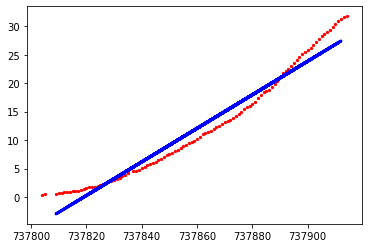

The mean squared error of this model is 3.7973301155024544

United States will have fully vaccined 69.86% of their population by the date 23/09/2021 based on current tracking.


In [65]:
# determine a country to investigate
country = 'United States'
# determine a date
date = '23/09/2021'

# try except to catch countries with no data (Australia) in the given column
try:
    # call function with the dataset, country and date
    # store returned values to be printed
    perc_at_date, mse, y_intercept, slope = perc_vaccinated_at_date(sean_vaccination, country, date)
    
    # show the MSE to determine how accurate the model is
    print("The mean squared error of this model is", mse)
    print()
    
    # check if country is full vaccinated and tell user that, or print where the country will be at
    if perc_at_date > 100:
        print(country, "will have fully vaccinated by" , date, "based on current tracking")
    else:
        # print data
        print(country, "will have fully vaccined", str(round(perc_at_date[0], 2)) + "% of their population by the date", date, "based on current tracking.")
except: 
    pass

Calculating total number of vaccinations administered at a given date.
<br><br>
This is for countries that don't have data in the dataset for people_fully_vaccinated_per_hundred, so we will use the total number of vaccines administered to get a guide as to how many people may have been vaccinated (2 doses per each member of population so up to 200%)

In [55]:
# read in cleaned dataset to new data frame
sean_vaccination2 = pd.read_csv('data/cleaned_vaccination.csv')

In [56]:
# take only the columns of interest
sean_vaccination2 = sean_vaccination2[['country', 'date', 'total_vaccinations_per_hundred']]
# show this shape
print(sean_vaccination2.shape)

# drop all na rows where no data for people fully vaccinated per hundred
sean_vaccination2 = sean_vaccination2[sean_vaccination2['total_vaccinations_per_hundred'].notna()]
# print the new shape
print(sean_vaccination2.shape)

# change date object to date time and then ordinal to be used in linear regression
sean_vaccination2['date'] = pd.to_datetime(sean_vaccination2['date'])
sean_vaccination2['date'] = sean_vaccination2['date'].map(dt.datetime.toordinal)

(15344, 3)
(9232, 3)


In [57]:
""" 
    Funtion to determine the total vaccinates provided by the given country at the provided date
    Requires:
        the pandas dataframe being worked on
        a valid country in string format, and
        a date in string format (DD/MM/YYYY)
"""
def perc_vaccinated_at_date(df, country, date):
    # try except to catch countries with no data in people_fully_vaccinated_per_hundred
    try:
        # create a linear regression model
        LR = LinearRegression()
    
        #change date passed to datetime then ordinal data
        date = datetime.strptime(date, '%d/%m/%Y').date().toordinal()
    
        # take only the portion of the data frame that relates to a specific country
        df = df[df['country'] == country]
    
        # get X and Y variables
        X = np.array(df['date']).reshape((-1, 1))
        Y = np.array(df['total_vaccinations_per_hundred'])
    
        # Split the training and test data using 30% for testing
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=19)
    
        # train the model
        LR.fit(Xtrain, Ytrain)
    
        # test on test set
        predictions = LR.predict(Xtest)

        # calculate the mean square error
        mse = np.mean((predictions - Ytest) ** 2)
        
        # Plot outputs
        plt.scatter(X, Y,  color='red', s=5)
        plt.plot(Xtest, predictions, color='blue', linewidth=3)

        plt.show()
    
        # return the percentage of population fully vaccinated at the given date,
        # the mean squared error, the Y intercept and the slope
        return (LR.intercept_ + LR.coef_ * date), mse, LR.intercept_, LR.coef_
    
    except:
        # if country doesnt have this data let the user know
        print(country, "has no data for total_vaccinations_per_hundred.")

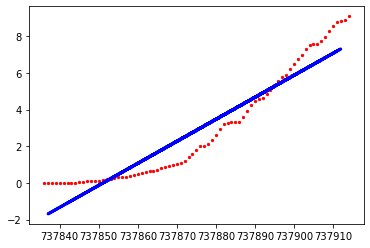

The mean squared error of this model is 0.9690784609297088

Australia will have administered 24.46% of vaccines required to their population by the date 22/09/2021 based on current tracking (200% required for 2 doses for each person).


In [58]:
# determine a country to investigate
country2 = 'Australia'
# determine a date
date2 = '22/09/2021'

# try except to catch countries with no data (Australia) in the given column
try:
    # call function with the dataset, country and date
    # store returned values to be printed
    total_at_date, mse2, y_intercept2, slope2 = perc_vaccinated_at_date(sean_vaccination2, country2, date2)
    
    # show the MSE to determine how accurate the model is
    print("The mean squared error of this model is", mse2)
    print()
    
    # check if country is full vaccinated and tell user that, or print where the country will be at
    print(country2, "will have administered", str(round(total_at_date[0], 2)) + "% of vaccines required to their population by the date", date2, "based on current tracking (200% required for 2 doses for each person).")
except: 
    pass